# ÍNDICE
# **Repsol D4D/D4B**
# **Introducción a Python para Análisis de Datos 🐍 📊**
# *Notebook 5: Exploratory Data Analysis (EDA)*

---

### 📋 ÍNDICE DE CONTENIDO
1. EDA PARA SERIES TEMPORALES
2. EDA PARA FRECUENCIA
3. EDA PARA CORRELACIÓN
4. EDA PARA DISTRIBUCIÓN
5. EJERCICIOS

### Juan Martin Bellido
* [linkedin.com/in/jmartinbellido](https://www.linkedin.com/in/jmartinbellido/) 
* jmbellido@isdi.education

In [ ]:
# Antes de empezar, cargamos librerías (instalamos en caso de ser necesario)
import pandas as pd
import scipy
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.plotting import scatter_matrix

In [ ]:
# La siguiente opción permite desplegar gráficos en Jupyter Notebook
%matplotlib inline

# EDA PARA SERIES TEMPORALES
---
En una serie temporal, estudiamos la evolución de una variable numérica a lo largo del tiempo. *Ejemplo: entender cómo ha evolucionado la facturación y presupuestos de películas de James Bond a lo largo del tiempo.*




In [ ]:
# Importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
df_jamesbond.dtypes

Film                  object
Year                   int64
Actor                 object
Director              object
Box Office           float64
Budget               float64
Bond Actor Salary    float64
dtype: object

### Gráfico utilizando pandas
---
Pandas incluye una serie de métodos que permiten graficar datos de forma simplificada. Este método integra y simplifica comandos propios de librerías más complejas de utilizar (principalmente *matplotlib*).

```
df.plot(kind='line',x,y)
```
*   El mismo método *.plot()* nos permitirá generar una gran variedad de visualizaciones, editando el parámetro *kind*



#### Versión 1
La forma más rápida y sencilla de graficar una serie temporal:
* *Indexamos por la variable temporal, pandas lo tomará como nuestro eje X*
* *Filtramos únicamente las variables que queramos graficar*
* *Anidamos método .plot() sin necesidad de editar ningún parámetro*

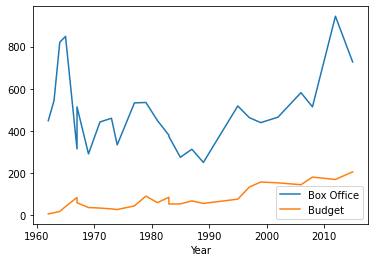

In [ ]:
# Gráfico de serie temporal simplificado utilizando .plot()
# Versión 1
# Eje X: variable temporal (año)
# Eje Y: variable monetaria ($)
# Series: (i) Box Office y (ii) Budget
df_jamesbond.set_index("Year")[["Box Office","Budget"]].plot()

#### Versión 2
Repetimos operación, pero esta vez editando parametros del método *.plot()*

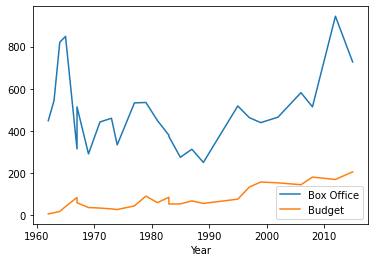

In [ ]:
# Versión 2
df_jamesbond.plot(
    kind='line'                 # especificamos el tipo de gráfico
    ,x='Year'                   # eje X
    ,y=["Box Office","Budget"]  # eje Y
)

#### Versión 3
Editamos parámetros opcionales para mejorar la visualización.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80ef99fed0>],
      dtype=object)

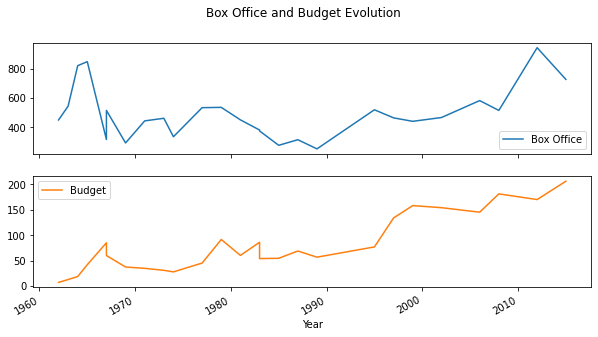

In [ ]:
# Versión 3
df_jamesbond.plot(
    kind='line'
    ,x='Year'
    ,y=["Box Office","Budget"]
    ,figsize=(10,5)                           # modificamos tamaño
    ,title='Box Office and Budget Evolution'  # agregamos título
    ,subplots=True                            # separamos variables en gráficos independientes
    ,layout=(2,1)                             # decidimos cómo orientar nuestros subplots
)

### Export un gráfico
---
Para exportar un gráfico generado en nuestro entorno, utilizaremos los métodos .get_figure() y .savefig(). Al utilizarlos, exportaremos un gráfico a nuestro directorio en formato imagen.

> ⚠️ *Esto no funciona en Google Colab*



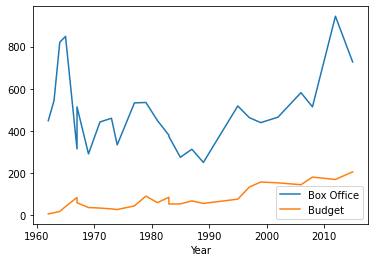

In [ ]:
# Exportamos gráfico
plot = df_jamesbond.set_index("Year")[["Box Office","Budget"]].plot()
plot.get_figure().savefig('my_chart.png')

# EDA PARA FRECUENCIA
---
Al explorar frecuencia, buscamos entender la cantidad de veces que se repite cada valor en una variable categórica. *Ejemplo: conocer en cúantas películas de James Bond a trabajado cada director.*

Funciones nuevas que introducimos en esta sección:

```
describe()
```
* *Al aplicar describe() a una variable categórica podemos obtener información básica sobre la cantidad de observaciones, valores únicos y frecuencia mayor.*

```
value_counts(normalize=False)
```
* *Este método permite obtener la frecuencia para cada valor único en una variable categórica. Por defecto, devuelve la frecuencia en valor absoluto; al editar el parámetro "normalize" permite obtener la frecuencia relativa.*

```
pd.crosstab(x,y)
```
* *Esta función nos permite crear una tabla de frecuencia entre dos variables.*

```
plot(kind='bar'/'barh')
```
* *Este método permite realizar gráficos simples de distinto tipo. En esta sección editaremos el parámetro "kind" para construir gráficos de barra.*





In [ ]:
# Importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# Generamos información básica sobre una variable categórica
df_jamesbond["Director"].describe()

count            26
unique           13
top       John Glen
freq              5
Name: Director, dtype: object

In [ ]:
# Obtenemos la frecuencia en valor absoluto
df_jamesbond["Director"].value_counts()

John Glen             5
Guy Hamilton          4
Lewis Gilbert         3
Terence Young         3
Sam Mendes            2
Martin Campbell       2
Ken Hughes            1
Peter R. Hunt         1
Marc Forster          1
Irvin Kershner        1
Michael Apted         1
Lee Tamahori          1
Roger Spottiswoode    1
Name: Director, dtype: int64

In [ ]:
# El parámetro normalize nos permite crear una tabla con la frecuencia relativa
df_jamesbond["Director"].value_counts(normalize=True)

John Glen             0.192308
Guy Hamilton          0.153846
Lewis Gilbert         0.115385
Terence Young         0.115385
Sam Mendes            0.076923
Martin Campbell       0.076923
Ken Hughes            0.038462
Peter R. Hunt         0.038462
Marc Forster          0.038462
Irvin Kershner        0.038462
Michael Apted         0.038462
Lee Tamahori          0.038462
Roger Spottiswoode    0.038462
Name: Director, dtype: float64

In [ ]:
# Podemos obtener la frecuancia para combinaciones de más de una variable categórica
df_jamesbond[["Director","Actor"]].value_counts()

Director            Actor         
Terence Young       Sean Connery      3
John Glen           Roger Moore       3
Sam Mendes          Daniel Craig      2
Guy Hamilton        Sean Connery      2
John Glen           Timothy Dalton    2
Lewis Gilbert       Roger Moore       2
Guy Hamilton        Roger Moore       2
Marc Forster        Daniel Craig      1
Martin Campbell     Daniel Craig      1
                    Pierce Brosnan    1
Lee Tamahori        Pierce Brosnan    1
Ken Hughes          David Niven       1
Michael Apted       Pierce Brosnan    1
Peter R. Hunt       George Lazenby    1
Irvin Kershner      Sean Connery      1
Roger Spottiswoode  Pierce Brosnan    1
Lewis Gilbert       Sean Connery      1
dtype: int64

In [ ]:
# Creamos una tabla de frecuencia utilizando la función pd.crosstab()
pd.crosstab(df_jamesbond.Actor,df_jamesbond.Director)

Director,Guy Hamilton,Irvin Kershner,John Glen,Ken Hughes,Lee Tamahori,Lewis Gilbert,Marc Forster,Martin Campbell,Michael Apted,Peter R. Hunt,Roger Spottiswoode,Sam Mendes,Terence Young
Actor,,,,,,,,,,,,,
Daniel Craig,0,0,0,0,0,0,1,1,0,0,0,2,0
David Niven,0,0,0,1,0,0,0,0,0,0,0,0,0
George Lazenby,0,0,0,0,0,0,0,0,0,1,0,0,0
Pierce Brosnan,0,0,0,0,1,0,0,1,1,0,1,0,0
Roger Moore,2,0,3,0,0,2,0,0,0,0,0,0,0
Sean Connery,2,1,0,0,0,1,0,0,0,0,0,0,3
Timothy Dalton,0,0,2,0,0,0,0,0,0,0,0,0,0


### Gráfico utilizando pandas
---


```
df.plot(kind='bar',x,y)
```


#### Versión 1

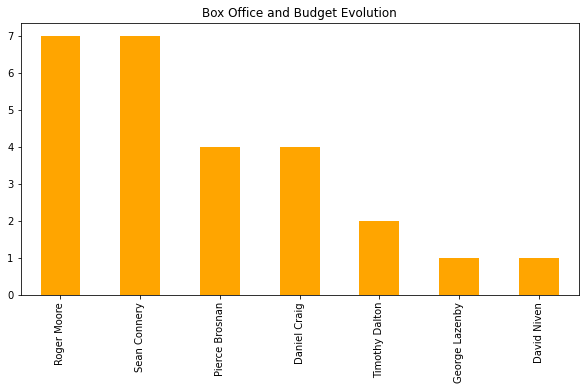

In [ ]:
# A continuación, utilizaremos un gráfico de barra (vertical) para visualizar la frecuencia
df_jamesbond["Actor"].value_counts().plot(
    kind = 'bar'
    ,x='Actor'
    ,figsize=(10,5)                           
    ,title='Box Office and Budget Evolution'  
    ,color='orange'                           # cambiamos color  
    )

#### Versión 2

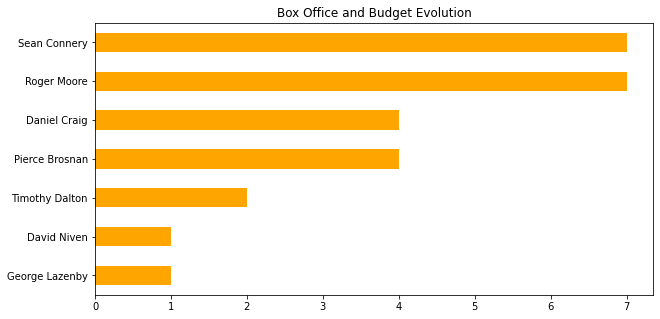

In [ ]:
# A continuación, utilizaremos un gráfico de barra (vertical) para visualizar la frecuencia
df_jamesbond["Actor"].value_counts().sort_values().plot(
    kind = 'barh'
    ,x='Actor'
    ,figsize=(10,5)                           
    ,title='Box Office and Budget Evolution'  
    ,color='orange'                            
    )

### Gráfico avanzado utilizando Seaborn
---
La librería Seaborn permite realizar visualizaciones avanzadas. Utilizaremos la función sn.catplot() para visualizar un gráfico de barra.

```
sn.catplot(kind='count', data=df, x)
```



In [ ]:
# Importamos dataframe desde una URL
df_fortune = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv")
df_fortune.dtypes

Rank          int64
Company      object
Sector       object
Industry     object
Location     object
Revenue       int64
Profits       int64
Employees     int64
dtype: object

#### Version 1

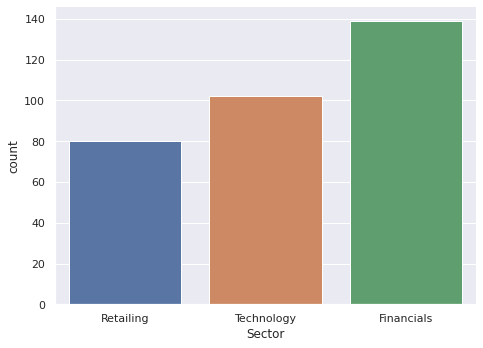

In [ ]:
# Filtramos el df y graficamos
cond=df_fortune['Sector'].isin(['Financials','Technology', 'Retailing'])

sn.catplot(
    data=df_fortune[cond],
    kind='count',
    x='Sector',
    height=5,
    aspect=11/8
)

#### Versión 2

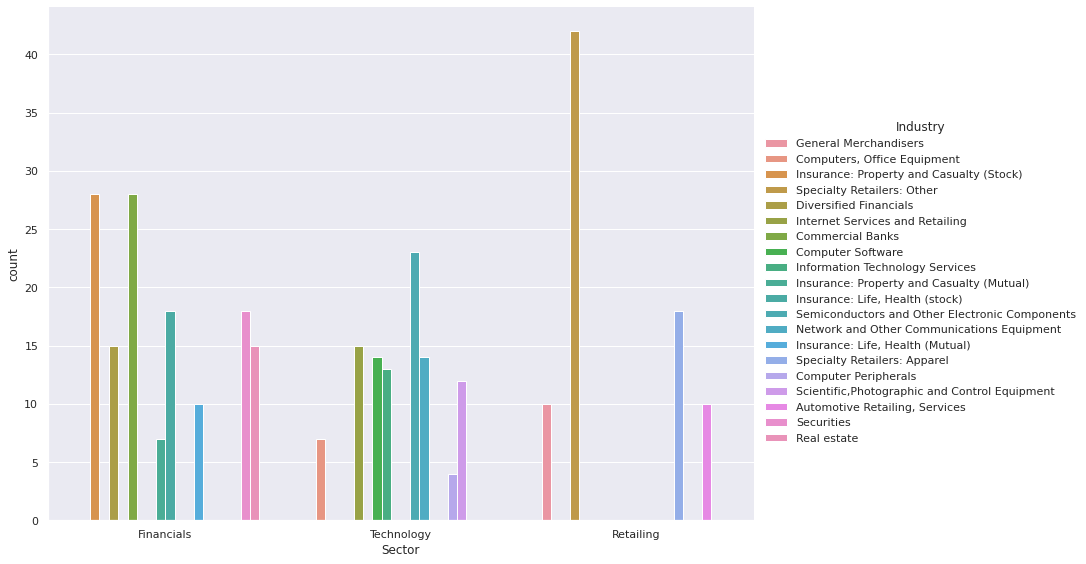

In [ ]:
# Filtramos el df
# Establecemos orden para las variables categóricas
# Utilizamos el parámetro hue para añadir una segunda variable al gráfico: Industry
cond=df_fortune['Sector'].isin(['Financials','Technology', 'Retailing'])
category_order = ['Financials','Technology', 'Retailing']

sn.catplot(
    data=df_fortune[cond],
    kind='count',
    x='Sector',
    order=category_order,
    hue='Industry',
    height=8,
    aspect=11/8
)

# EDA PARA CORRELACIÓN
---
Al explorar correlación, buscamos medir el grado de asociación y dirección entre dos variable continuas. *Ejemplo: cual es la relación entre el presupuesto de una película y su facturación.*

*Funciones nuevas que introducimos en esta sección:*

```
scipy.stats.pearsonr(x,y)
```
> *Esta función permite obtener la correlación (Pearson) entre dos variables continuas; también proporciona el p-value para la prueba de hipótesis de que no existe correlación entre las variables (H0: r=0%)*

```
corr()
```
> *Este método permite construir una matrix de correlación*

```
plot(x,y,kind="scatter")
```
> *En esta sección, utilizaremos el método plot para visualizar gráficos de dispersión*

```
sn.heatmap(object, annot=True)
```
> *Este método permite visualizar gráficos de tipo "heatmap"*; el parámetro "annot" permite añadir anotaciones al gráfico


In [ ]:
# Importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# Obtenemos la correlación entre dos variables continuas en nuestro DataFrame
## el tipo de correlación utilizada es pearson's
scipy.stats.pearsonr(df_jamesbond["Box Office"],df_jamesbond["Budget"])
# Nota: el grado de correlación entre las variables seleccionadas es positivo y bajo (28%)

(0.28318466575203255, 0.1609638785608065)

In [ ]:
# A continuación, construiremos una matrix de correlación para evaluar la correlación entre todas las variables continuas
df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()
## las variables con mayor grado de correlación son "Budget" y "Bond Actor Salary"

,Box Office,Budget,Bond Actor Salary
Box Office,1.000000,0.283185,0.069542
Budget,0.283185,1.000000,0.728390
Bond Actor Salary,0.069542,0.728390,1.000000


### Gráfico de dispersión utilizando pandas
---

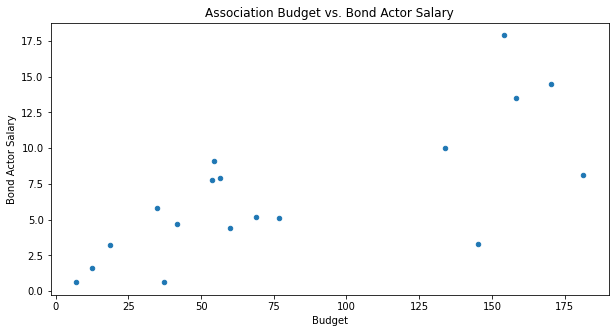

In [ ]:
# Utilizamos el método plot(), especificando dos variables numéricas para realizar un gráfico de dispersión
df_jamesbond.plot(
    kind="scatter"               # especificamos dispersión
    ,x="Budget"
    ,y="Bond Actor Salary"
    ,title='Association Budget vs. Bond Actor Salary'
    ,figsize=(10,5) 
)

### Gráfico de dispersión utilizando Seaborn
---

#### Version 1

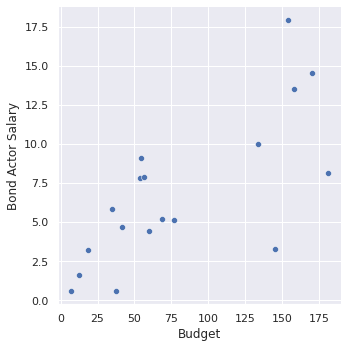

In [ ]:
# Gráfico de dispersión simple
sn.relplot(
    x="Budget",
    y="Bond Actor Salary",
    data=df_jamesbond
)

#### Version 2

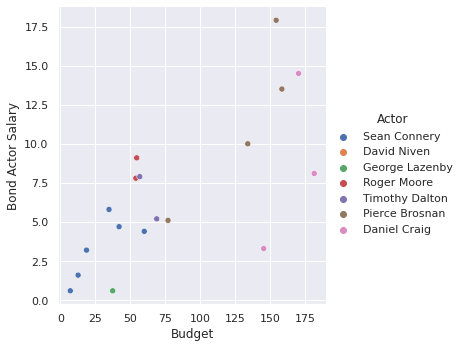

In [ ]:
# Dos variables
sn.relplot(
    x="Budget",
    y="Bond Actor Salary",
    data=df_jamesbond,
    hue="Actor"
)

#### Version 3

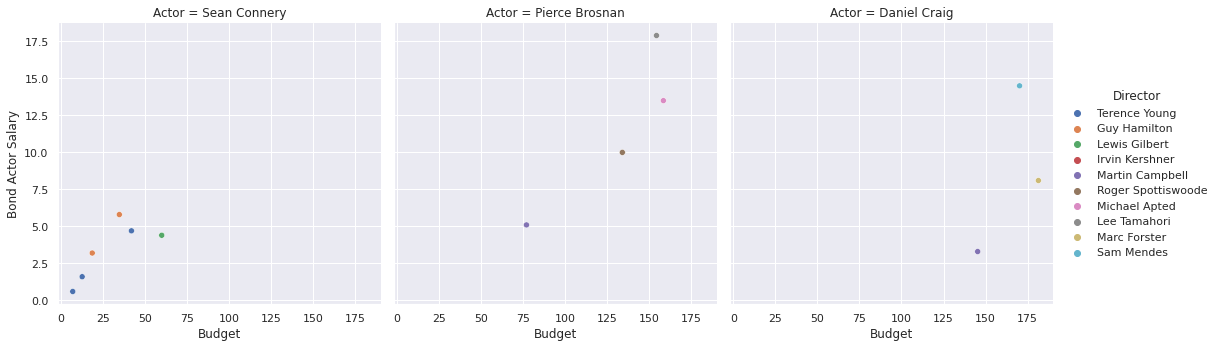

In [ ]:
# Tres variables
# Filtramos por tres actores para simplificar
cond = df_jamesbond.Actor.isin(['Sean Connery','Pierce Brosnan','Daniel Craig'])
sn.relplot(
    x="Budget",
    y="Bond Actor Salary",
    data=df_jamesbond[cond],
    hue="Director",
    col="Actor"
)

### Gráfico heatmap utilizando Seaborn
---

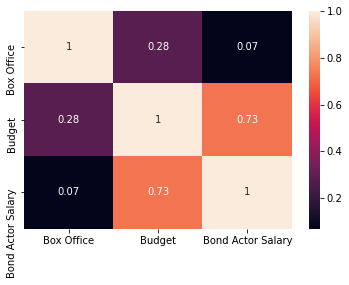

In [ ]:
# la siguiente línea de código permite editar el tamaño de los gráficos propios de la librería seaborn (sn)
sn.set(rc={'figure.figsize':(12,8)}) # cambiamos tamaño
# Para visualizar una matriz de correlación, podemos utilizar un gráfico de tipo "heatmap"
corrMatrix= df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()
sn.heatmap(corrMatrix, annot=True) # utilizamos la librearía seaborn para realizar un heatmap

# EDA PARA DISTRIBUCIÓN
---
El estudiar distribución, buscamos entender cómo se encuentra dispersa una variable continua en el total de observaciones. 

*Funciones nuevas que introducimos en esta sección:*

```
describe(object,percentiles=[...])
```
> Este método permite obtener la distribución de todas las variables numéricas incluidas en un DataFrame. Por defecto, despliega la distribución en cuartiles, podemos editar esto utilizando el parámetro "percentiles"

```
plot(kind='hist')
```
> Podemos modificar el atributo *kind* dentro de *plot()* para graficar histogramas

```
.boxplot(by, column)
```
> Este método permite graficar boxplots



In [ ]:
# Importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# Seleccionamos variables continuas y analizamos su distribución
df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].describe()

,Box Office,Budget,Bond Actor Salary
count,26.000000,26.000000,18.000000
mean,491.611538,80.719231,6.850000
std,176.740396,57.097608,4.805175
min,250.900000,7.000000,0.600000
25%,375.350000,38.450000,3.575000
50%,461.750000,60.050000,5.500000
75%,534.500000,123.300000,8.850000
max,943.500000,206.300000,17.900000


In [ ]:
# A continuación, editamos la distribución para poder verla en deciles
df_jamesbond[['Box Office','Budget','Bond Actor Salary']].describe(
    percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # especificamos cómo queremos la distribución
    ).T # pivotamos la tabla para pasar de una tabla larga a una ancha

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Box Office,26.0,491.611538,176.740396,250.9,302.50,334.00,409.75,448.80,461.75,514.20,525.75,543.80,773.55,943.5
Budget,26.0,80.719231,57.097608,7.0,23.15,34.70,43.50,54.50,60.05,76.90,88.75,145.30,164.25,206.3
Bond Actor Salary,18.0,6.850000,4.805175,0.6,1.30,3.24,4.43,5.02,5.50,7.82,8.08,9.64,13.80,17.9


### Histograma 
---

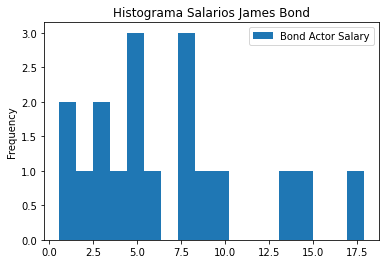

In [ ]:
# Seleccionamos una variable continua y graficamos un histograma
df_jamesbond.plot(
    kind='hist'
    ,y='Bond Actor Salary'
    ,bins=18
    ,title='Histograma Salarios James Bond'
)

### Gráfico de densidad
---

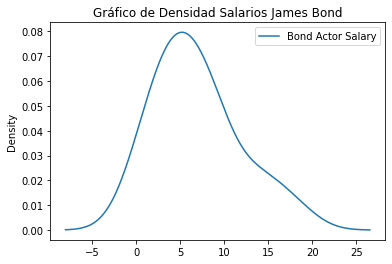

In [ ]:
# Seleccionamos una variable continua y graficamos un gráfico de densidad
df_jamesbond.plot(
    kind='density'
    ,y='Bond Actor Salary'
    ,title='Gráfico de Densidad Salarios James Bond'
)

### Boxplot
---

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


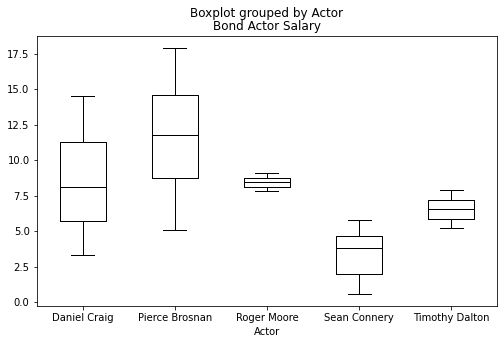

In [ ]:
# A continuación, graficamos un boxplot para visualizar la distribución por grupos de una variable categórica
# Creamos una condición para seleccionar ciertos actores
cond = df_jamesbond["Actor"].isin(['Sean Connery','Daniel Craig','Roger Moore','Pierce Brosnan','Timothy Dalton'])
# Graficamos un boxplot
df_jamesbond[cond].boxplot(
    by ='Actor'
    ,column ='Bond Actor Salary'
    ,grid = False
    ,color = 'black'
    ,figsize=(8,5)
)

# EDA PARA MATRIZ DE DISPERSIÓN
---
Una matriz de dispersión es una colección de gráficos organizada en forma de cuadrícula. Incluye gráficos de dispersión e histogramas y resulta particularmente útil para analizar rápidamente un conjunto de variables numéricas.

In [ ]:
# Importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa040b8f650>,
      dtype=object)

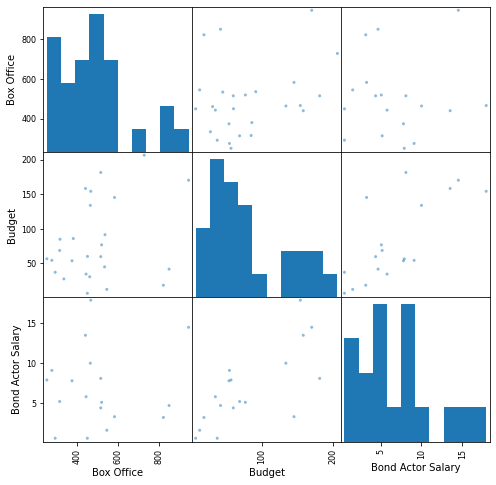

In [ ]:
# Graficamos una matriz de dispersión para estudiar la distribución y el grado de asosciacón entre las variables numéricas
scatter_matrix(df_jamesbond[['Box Office','Budget','Bond Actor Salary']],figsize=(8,8))

# EJERCICIOS
---

### EX 1: EDA para series temporales
---
¿Cómo ha evolucionado la cotización "High" de las acciones desde el 2017?
> Dataset https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv


In [ ]:
# Importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from pandas.plotting import scatter_matrix

In [ ]:
# Importamos df
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
df_amzn.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

### EX 2: EDA para correlación 
---
Analizar la relación entre número de empleados (*Employees*) y facturación (*Revenue*) para las empresas de los sectores: *Energy, Aerospace & Defense y Hotels, Resturants & Leisure*. Visualizar gráfico de dispersión utilizando Seaborn. Generar un gráfico por sector.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv



In [ ]:
import pandas as pd
import seaborn as sn

In [ ]:
df_fortune = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv")
df_fortune.dtypes

Rank          int64
Company      object
Sector       object
Industry     object
Location     object
Revenue       int64
Profits       int64
Employees     int64
dtype: object

### EX 3: EDA para distribución
---
Graficar un histograma para visualizar la distribución de la variable IMDB score

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv



In [ ]:
# importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from pandas.plotting import scatter_matrix

In [ ]:
# Importamos df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

### EX 4: EDA para distribución
---
¿Qué podemos decir acerca de la distribución del PIB per cápita en cada continente? Graficar un boxplot

> Dataset https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv

In [ ]:
# Importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from pandas.plotting import scatter_matrix

In [ ]:
# Importamos df
df_who = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv')
df_who.dtypes

Country                                                    object
CountryID                                                   int64
ContinentID                                                 int64
Adolescent fertility rate (%)                             float64
Adult literacy rate (%)                                   float64
Gross national income per capita (PPP international $)    float64
Net primary school enrolment ratio female (%)             float64
Net primary school enrolment ratio male (%)               float64
Population (in thousands) total                           float64
Population annual growth rate (%)                         float64
Population in urban areas (%)                             float64
Population living below the poverty line                  float64
Continent                                                  object
dtype: object

### EX 5: EDA para correlación
--- 

##### EX 5.A: ¿Cuántos directores hay incluidos en el dataset?
##### EX 5.B: Extraer top 10 variables, según correlación con variable *IMDB score*

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv



In [ ]:
# Importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from pandas.plotting import scatter_matrix

In [ ]:
# Importamos df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m